In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [ ]:
URL = "https://listado.mercadolibre.com.ar/samsung#D[A:samsung]"
page = requests.get(URL)

In [ ]:
# page.content

In [ ]:
soup = BeautifulSoup(page.content, "html.parser")

In [ ]:
?? BeautifulSoup.find_all

In [ ]:
soup.find_all("li", class_="ui-search-layout__item shops__layout-item ui-search-layout__stack")

[]

In [ ]:
resultados = soup.find_all("li", class_="ui-search-layout__item shops__layout-item ui-search-layout__stack")

¿Qué es resultados?

función type y ??

Entonces, ¿puedo acceder a los elemntos que encontré?

In [ ]:
len(resultados)

54

In [ ]:
resultados[0].findChildren('h2')

[<h2 aria-level="3" class="ui-search-item__title">Samsung Galaxy A54 5G 256 GB  Awesome graphite 8 GB RAM</h2>]

In [ ]:
resultados[0].findChild(class_="andes-money-amount__fraction")

<span aria-hidden="true" class="andes-money-amount__fraction">939.999</span>

In [ ]:
resultados[0].findChild('h2').getText()

'Samsung Galaxy S21 Fe Blanco 5g'

In [ ]:
resultados[0].findChildren(class_="andes-money-amount__fraction")[2]

<span aria-hidden="true" class="andes-money-amount__fraction">669.999</span>

¿Por qué hay dos?

Es la oferta, en la página se ve así

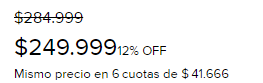

Entonces, si hay dos queremos agarrar el segundo.

In [ ]:
for elem in resultados:
  titulo = elem.findChild('h2').getText()
  precios = elem.findChildren(class_="andes-money-amount__fraction")
  if len(precios) > 1:
    precio = precios[1].getText()
  else:
    precio = precios[0].getText()
  print(titulo, precio, "\n")

Samsung Galaxy A54 5G 256 GB  Awesome graphite 8 GB RAM 874.999 

Samsung Galaxy A04 128 GB Negro 4 GB RAM 259.999 

Samsung Galaxy A14 128GB Negro 4GB RAM 293.799 

Samsung Galaxy A04s 4 + 128gb Color Verde 314.999 

Samsung Galaxy A15 4G Dual SIM 128 GB  azul oscuro 6 GB RAM 310.500 

Samsung Galaxy A05 64 GB  verde claro 4 GB RAM 269.999 

Samsung Galaxy A34 128gb 6gb Ram Awesome Silver  569.999 

Samsung Galaxy A24 128 Gb Light Green 4 Gb Ram 524.999 

Samsung Galaxy S22 Ultra 256 Gb  Phantom Black 12 Gb Ram 1.099.999 

Samsung Galaxy A32 128 Gb  Azul 4 Gb Ram 277.099 

Celular Samsung Galaxy A04 64gb 4gb Color Verde 180.499 

Samsung Galaxy A23 5G 5G 128 GB  awesome black 4 GB RAM 453.299 

Samsung Galaxy A04e 3+64gb 6,5 Pulgadas Octa-core Color Black 194.500 

Samsung Galaxy A54 5G 128 GB  awesome graphite 8 GB RAM 624.999 

Celular Samsung Galaxy A04 128gb 4gb Ram Negro 247.799 

Samsung Galaxy S23 Ultra 5G 256 GB  cream 12 GB RAM 1.645.599 

Samsung Galaxy S20 Fe 128 Gb  Cloud 

Agregamos info de cuotas?

In [ ]:
for elem in resultados:
  print(elem.findChildren(class_="ui-search-item__group__element ui-search-installments ui-search-color--LIGHT_GREEN"))

[<div class="ui-search-item__group__element ui-search-installments ui-search-color--LIGHT_GREEN"><span>Mismo precio en 9‚ÄØcuotas de $‚ÄØ97.222</span></div>]
[<div class="ui-search-item__group__element ui-search-installments ui-search-color--LIGHT_GREEN"><span>Mismo precio en 9‚ÄØcuotas de $‚ÄØ28.888</span></div>]
[<div class="ui-search-item__group__element ui-search-installments ui-search-color--LIGHT_GREEN"><span>Mismo precio en 9‚ÄØcuotas de $‚ÄØ39.999</span></div>]
[<div class="ui-search-item__group__element ui-search-installments ui-search-color--LIGHT_GREEN"><span>Mismo precio en 9‚ÄØcuotas de $‚ÄØ34.999</span></div>]
[<div class="ui-search-item__group__element ui-search-installments ui-search-color--LIGHT_GREEN"><span>Cuota Simple en 6‚ÄØcuotas de $‚ÄØ60.071</span></div>]
[<div class="ui-search-item__group__element ui-search-installments ui-search-color--LIGHT_GREEN"><span>Mismo precio en 9‚ÄØcuotas de $‚ÄØ29.999</span></div>]
[<div class="ui-search-item__group__element ui-searc

Notar que sale toda la info html (<div class...) por que no le puse getText()

Entonces hasta ahora tenemos título, precio y cuotas. Vamos a ver cómo meterlo en un dataframe.

In [ ]:
df = pd.DataFrame(columns=['titulo','precio','cuotas'])


for elem in resultados:
  titulo = elem.findChild('h2').getText()
  precios = elem.findChildren(class_="andes-money-amount__fraction")

  if len(precios) > 1:
    precio = precios[1]
  else:
    precio = precios[0].getText()

  cuotas = elem.findChildren(class_="ui-search-item__group__element ui-search-installments ui-search-color--LIGHT_GREEN")
  if len(cuotas) > 0:
    cuotas = cuotas[0].getText()
  else:
    cuotas = ""

  nueva_fila = pd.Series({'titulo' : titulo , 'precio' : precio,'cuotas': cuotas})
  df = pd.concat([df,nueva_fila.to_frame().T], ignore_index=True)



In [ ]:
df

,titulo,precio,cuotas
0,Samsung Galaxy A54 5G 256 GB Awesome graphite...,[874.999],Mismo precio en 9‚ÄØcuotas de $‚ÄØ97.222
1,Samsung Galaxy A04 128 GB Negro 4 GB RAM,[259.999],Mismo precio en 9‚ÄØcuotas de $‚ÄØ28.888
2,Samsung Galaxy A14 128GB Negro 4GB RAM,[293.799],Mismo precio en 9‚ÄØcuotas de $‚ÄØ39.999
3,Samsung Galaxy A04s 4 + 128gb Color Verde,314.999,Mismo precio en 9‚ÄØcuotas de $‚ÄØ34.999
4,Samsung Galaxy A15 4G Dual SIM 128 GB azul os...,310.500,Cuota Simple en 6‚ÄØcuotas de $‚ÄØ60.071
5,Samsung Galaxy A05 64 GB verde claro 4 GB RAM,[269.999],Mismo precio en 9‚ÄØcuotas de $‚ÄØ29.999
6,Samsung Galaxy A34 128gb 6gb Ram Awesome Silver,[569.999],Mismo precio en 6‚ÄØcuotas de $‚ÄØ94.999
7,Samsung Galaxy A24 128 Gb Light Green 4 Gb Ram,524.999,Mismo precio en 9‚ÄØcuotas de $‚ÄØ58.333
8,Samsung Galaxy S22 Ultra 256 Gb Phantom Black...,1.099.999,Cuota Simple en 6‚ÄØcuotas de $‚ÄØ212.813
9,Samsung Galaxy A32 128 Gb Azul 4 Gb Ram,277.099,Cuota Simple en 6‚ÄØcuotas de $‚ÄØ53.609


Lo hacemos con todas las publicaciones?
Si vamosa a la página 2 de mercado libre, vemos que la url es

https://listado.mercadolibre.com.ar/samsung_Desde_51_NoIndex_True.

Y la página 3 es

https://listado.mercadolibre.com.ar/samsung_Desde_101_NoIndex_True

Vamos que el "desde_n" aumenta de a 50. Como hay 40 páginas enlistadas, saquemos los datos de todas!

Ahora armamos las URLS


In [ ]:
contador = 1
urls = []
for i in range(30):
  contador = contador + 50
  url_actual = f"https://listado.mercadolibre.com.ar/samsung_Desde_{contador}_NoIndex_True"
  print(url_actual)
  urls.append(url_actual)

https://listado.mercadolibre.com.ar/samsung_Desde_51_NoIndex_True
https://listado.mercadolibre.com.ar/samsung_Desde_101_NoIndex_True
https://listado.mercadolibre.com.ar/samsung_Desde_151_NoIndex_True
https://listado.mercadolibre.com.ar/samsung_Desde_201_NoIndex_True
https://listado.mercadolibre.com.ar/samsung_Desde_251_NoIndex_True
https://listado.mercadolibre.com.ar/samsung_Desde_301_NoIndex_True
https://listado.mercadolibre.com.ar/samsung_Desde_351_NoIndex_True
https://listado.mercadolibre.com.ar/samsung_Desde_401_NoIndex_True
https://listado.mercadolibre.com.ar/samsung_Desde_451_NoIndex_True
https://listado.mercadolibre.com.ar/samsung_Desde_501_NoIndex_True
https://listado.mercadolibre.com.ar/samsung_Desde_551_NoIndex_True
https://listado.mercadolibre.com.ar/samsung_Desde_601_NoIndex_True
https://listado.mercadolibre.com.ar/samsung_Desde_651_NoIndex_True
https://listado.mercadolibre.com.ar/samsung_Desde_701_NoIndex_True
https://listado.mercadolibre.com.ar/samsung_Desde_751_NoIndex_T

In [ ]:
# df = pd.DataFrame(columns=['titulo','precio','cuotas'])
for URL in urls:
  page = requests.get(URL)
  soup = BeautifulSoup(page.content, "html.parser")
  resultados = soup.find_all("li", class_="ui-search-layout__item shops__layout-item ui-search-layout__stack")

  for elem in resultados:
    titulo = elem.findChild('h2').getText()
    precios = elem.findChildren(class_="andes-money-amount__fraction")

    if len(precios) > 1:
      precio = precios[1].getText()
    else:
      precio = precios[0].getText()

    cuotas = elem.findChildren(class_="ui-search-item__group__element ui-search-installments ui-search-color--LIGHT_GREEN")
    if len(cuotas) > 0:
      cuotas = cuotas[0].getText()
    else:
      cuotas = ""

    nueva_fila = pd.Series({'titulo' : titulo , 'precio' : precio,'cuotas': cuotas})
    df = pd.concat([df,nueva_fila.to_frame().T], ignore_index=True)

In [ ]:
df

,titulo,precio,cuotas
0,Samsung Galaxy S22 Ultra 256 Gb Phantom Black...,1.099.999,Cuota Simple en 6‚ÄØcuotas de $‚ÄØ212.813
1,Samsung Galaxy A32 128 Gb Azul 4 Gb Ram,277.099,Cuota Simple en 6‚ÄØcuotas de $‚ÄØ53.609
2,Samsung Galaxy A50 64 Gb White 4 Gb Ram Liberado,206.656,Mismo precio en 12‚ÄØcuotas de $‚ÄØ17.221
3,Samsung Galaxy A51 128 Gb White 4 Gb Ram Liberado,319.759,Mismo precio en 12‚ÄØcuotas de $‚ÄØ26.646
4,Samsung Galaxy A20s 32 Gb Negro 3 Gb Ram,180.539,Cuota Simple en 6‚ÄØcuotas de $‚ÄØ34.928
...,...,...,...
1655,"Smartwatch Samsung Galaxy Fit 3 Amoled 1,6'' D...",107.799,
1656,Toner Alternativo Para Samsung 104s Premium 16...,22.968,
1657,Juego De Filtros Para Aspiradora Samsung Vcma2...,17.499,
1658,Memorias Pc Ddr3 4gb 1333 Mhz 2rx8 Pc3 10600u...,13.500,


In [ ]:
df.to_excel('samsung.xlsx')